**WEB SCRAPING IIT KGP WEBSITE**

In [4]:
# Ran On VS CODE
!pip install selenium
!pip install webdriver_manager
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options
from webdriver_manager.firefox import GeckoDriverManager
import time
import csv
import pandas as pd


# Set up Firefox options
firefox_options = Options()

# Initialize Firefox WebDriver
service = Service(GeckoDriverManager().install())
driver = webdriver.Firefox(service=service, options=firefox_options)

In [ ]:
#RAN ON VS CODE
driver.get("https://ndl.iitkgp.ac.in/se_browse/educationalLevel?educationalLevel%5B%5D=07&subjectClass%5B%5D=01000000%2F01040000")

# Optional: wait for page to load
time.sleep(5)  # Replace with WebDriverWait for reliability

# Data storage
video_data = []

try:
    # Find all video cards
    video_cards = driver.find_elements(By.CSS_SELECTOR, "div.card")
    for card in video_cards:
        try:
            # Extract video link and title
            title_elem = card.find_element(By.CSS_SELECTOR, "a.card-title.h5.link-primary")
            video_link = title_elem.get_attribute("href")
            video_title = title_elem.text.strip()

            # Extract description
            try:
                description = card.find_element(By.CSS_SELECTOR, "p.card-text").text.strip()
            except:
                description = "N/A"

            # Extract 'Show More' content if available
            try:
                show_more = card.find_element(By.CSS_SELECTOR, "span.text-more").text.strip()
                description += " " + show_more  # Append to description
            except:
                pass

            # Extract content provider
            try:
                content_provider = card.find_element(By.CSS_SELECTOR, "div.text-primary span").text.strip()
            except:
                content_provider = "N/A"

            # Extract language
            try:
                language = card.find_element(By.CSS_SELECTOR, "small").text.strip()
            except:
                language = "N/A"

            # Store the data
            video_data.append([video_link, video_title, description, content_provider, language])

        except Exception as e:
            print("⚠️ Error processing a video card:", e)

except Exception as e:
    print("⚠️ Error finding video cards:", e)

# Save data to CSV
csv_filename = "Class8_Maths.csv"
with open(csv_filename, mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["Video Link", "Title", "Description", "Content Provider", "Language"])
    writer.writerows(video_data)

print(f"✅ Data extraction complete! Saved to {csv_filename}.")

# Keep browser open for manual interaction
try:
    while True:
        time.sleep(1)
except KeyboardInterrupt:
    print("\n🚪 Closing the browser...")
    driver.quit()

In [5]:
class_6_science= pd.read_csv('Class6_Science.csv')
class_6_maths= pd.read_csv('Class6_Maths.csv')
class_7_science= pd.read_csv('Class7_Science.csv')
class_7_maths= pd.read_csv('Class7_Maths.csv')
class_8_science= pd.read_csv('Class8_Science.csv')
class_8_maths= pd.read_csv('Class8_Maths.csv')

In [6]:


all_data = pd.concat([class_6_science, class_6_maths, class_7_science, class_7_maths, class_8_science, class_8_maths], axis=0)
all_data.reset_index(drop=True, inplace=True)
all_data


,Video Link,Title,Description,Content Provider,Language
0,http://ndl.iitkgp.ac.in/se_document/raj_egyan/...,Pin Hole Camerra,NaN,Raj-eGyan,Hindi
1,http://ndl.iitkgp.ac.in/se_document/raj_egyan/...,Rivers and Oceans,NaN,Raj-eGyan,Hindi
2,http://ndl.iitkgp.ac.in/se_document/raj_egyan/...,Wet Lands in India,NaN,Raj-eGyan,Hindi
3,http://ndl.iitkgp.ac.in/se_document/raj_egyan/...,Why Do We Blink Our Eyes,NaN,Raj-eGyan,Hindi
4,http://ndl.iitkgp.ac.in/se_document/raj_egyan/...,Why Mars is Red,NaN,Raj-eGyan,Hindi
...,...,...,...,...,...
17870,http://ndl.iitkgp.ac.in/se_document/mathademic...,Percent Change,"This video lecture shows the percent change, p...",Mathademics,English
17871,http://ndl.iitkgp.ac.in/se_document/mathademic...,Act Out or Use Objects Part 2,This video lecture shows how we can solve the ...,Mathademics,English
17872,http://ndl.iitkgp.ac.in/se_document/mathademic...,Pythagorean Theorem,This video lecture shows how we can find the v...,Mathademics,English
17873,http://ndl.iitkgp.ac.in/se_document/yt_mitk12v...,PLAY BALL: The House that Euclid Built,"How to make a baseball diamond with chalk, a r...",MITK12Videos,English 2012-02-03


In [7]:
all_data.describe()

,Video Link,Title,Description,Content Provider,Language
count,17875,17875,12962,17875,17863
unique,17438,10188,7190,27,1922
top,http://ndl.iitkgp.ac.in/se_document/the_kid_sh...,Equivalent Fractions,Some of the biggest evolution questions finall...,PBS LearningMedia,English
freq,3,12,24,5010,5394


In [8]:
all_data['Content Provider'].unique()

array(['Raj-eGyan', 'Annenberg Learner', 'BioEd Online', 'DIKSHA',
       'Kendriya Vidyalaya Devlali (No.1)',
       'Kendriya Vidyalaya Sangathan (Agra Region)', 'PBS LearningMedia',
       'Science Kids', 'The Kid Should See This', 'WatchKnowLearn',
       'School Education Department Government of West Bengal (Banglar Shiksha)',
       'filo', 'Khan Academy', 'Math Mammoth', 'MathTV', 'NRICH',
       'TeachEngineering: STEM curriculum for K-12',
       'The Video Math Tutor', 'Wild Maths', 'Mathademics',
       'National Informal STEM Education Network (NISE Net)', 'TED Ed',
       'Math Warehouse', 'LearnBix', 'Underground Mathematics', 'VidOnko',
       'MITK12Videos'], dtype=object)

In [10]:
all_data_sorted = all_data.sort_values('Content Provider')

2 Types Of Content Found :

1.   Redirecting To You Tube Videos
2.   Redirecting To Their Websites which have text / videos and some interactive stuff



**Extracting You Tube Video Details**

In [ ]:
import re
from time import sleep
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from datetime import datetime

service = Service("/usr/bin/chromedriver")
options = Options()
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("--headless")  # Run in headless mode

for index, row in all_data_sorted.iterrows():  # index,row is the format for iterrows() output
    try:
        if row['Content Provider'] == 'DIKSHA':  # row contains row data as a Series
            print(row)  # Print current row series where condition is true
            link = row['Video Link']

            try:
                driver = webdriver.Chrome(service=service, options=options)
                driver.get(link)
                sleep(40)

                # Switch to the first iframe
                try:
                    iframe = driver.find_element(By.ID, "content-holder")
                    driver.switch_to.frame(iframe)
                except Exception as e:
                    print("Error switching to iframe (content-holder):", e)

                # Click the video link button
                try:
                    btn = driver.find_element(By.CSS_SELECTOR, 'a.btn.btn-success')  # CSS Selector method
                    vid_link = btn.get_attribute('href')
                    print(vid_link)

                    driver.get(vid_link)
                except Exception as e:
                    print("Error finding video link button:", e)

                sleep(60)

                # Switch through multiple iframes
                try:
                    iframe = driver.find_element(By.ID, "contentPlayer")
                    driver.switch_to.frame(iframe)

                    iframe = driver.find_element(By.ID, "org.ekstep.youtuberenderer")
                    driver.switch_to.frame(iframe)

                    iframe = driver.find_element(By.ID, "youtubeIframe")
                    driver.switch_to.frame(iframe)
                except Exception as e:
                    print("Error switching to nested iframes:", e)

                # Extract YouTube video link
                try:
                    youtube_vid = driver.find_element(By.CSS_SELECTOR, 'a.ytp-button.ytp-button.yt-uix-sessionlink')
                    youtube_vid = youtube_vid.get_attribute('href')
                    print(youtube_vid)
                    all_data_sorted.loc[index, "Youtube Video Link"] = youtube_vid
                except Exception as e:
                    print("Error finding YouTube video link:", e)

            except Exception as e:
                print("Error initializing driver or loading page:", e)

            # Open YouTube video in a new driver
            try:
                driver = webdriver.Chrome(service=service, options=options)
                driver.get(youtube_vid)
                sleep(16)

                # Extract video details
                try:
                    # Likes
                    like_count = "N/A"
                    try:
                        like_element = driver.find_element(By.CLASS_NAME, "ytLikeButtonViewModelHost")
                        like_element = like_element.find_element(By.CLASS_NAME, "yt-spec-button-shape-next__button-text-content")
                        like_count = like_element.text
                    except Exception as e:
                        print("Like count not found!", e)

                    all_data_sorted.loc[index, "likes"] = like_count

                    # Views
                    views = "N/A"
                    try:
                        view_elem = driver.find_element(By.ID, "info-container")
                        view_elem = view_elem.find_elements(By.ID, "info")
                        text = view_elem[0].text
                        views_match = re.search(r"([\d\.]+[KM]?) views", text)
                        views = views_match.group(1) if views_match else "N/A"
                    except Exception as e:
                        print("Error extracting views:", e)

                    all_data_sorted.loc[index, "views"] = views

                    # Upload Year
                    upload_year = "N/A"
                    try:
                        years_ago_match = re.search(r"(\d+) years ago", text)
                        years_ago = int(years_ago_match.group(1)) if years_ago_match else 0
                        current_year = datetime.now().year
                        upload_year = current_year - years_ago if years_ago else "N/A"
                    except Exception as e:
                        print("Error extracting upload year:", e)

                    all_data_sorted.loc[index, "upload_year"] = upload_year

                    # Subscriber Count
                    sub_count = "N/A"
                    try:
                        sub = driver.find_element(By.ID, "owner-sub-count")
                        sub_count = sub.text
                    except Exception as e:
                        print("Error extracting subscriber count:", e)

                    all_data_sorted.loc[index, "subscriber_count"] = sub_count

                    # Title
                    title = "N/A"
                    try:
                        tit = driver.find_element(By.ID, "above-the-fold")
                        tit = tit.find_element(By.ID, "title")
                        title = tit.text
                    except Exception as e:
                        print("Error extracting title:", e)

                    all_data_sorted.loc[index, "title"] = title

                    # Duration
                    duration = "N/A"
                    try:
                        dur = driver.find_element(By.CLASS_NAME, "ytp-time-duration")
                        duration = dur.text
                    except Exception as e:
                        print("Error extracting duration:", e)

                    all_data_sorted.loc[index, "duration"] = duration

                    # Description
                    description = "N/A"
                    try:
                        des = driver.find_element(By.ID, "description-inline-expander")
                        des = des.find_element(By.CLASS_NAME, "yt-core-attributed-string--link-inherit-color")
                        description = des.text
                    except Exception as e:
                        print("Error extracting description:", e)

                    all_data_sorted.loc[index, "description"] = description

                except Exception as e:
                    print("Error processing video data:", e)

                #print(all_data_sorted)

            except Exception as e:
                print("Error loading YouTube video page:", e)

            finally:
                driver.quit()  # Ensure driver quits even if an error occurs

    except Exception as e:
        print("Unexpected error processing row:", e)


Filtered Data By Manual Checking and Removed some unneccessary content

In [29]:
import pandas as pd
import re
from datetime import datetime
data = pd.read_excel('filtered_data_sorted.xlsx')

# Convert the data into a pandas DataFrame
all_data = pd.DataFrame(data)
import pandas as pd
import re

def convert_views(view_str):
    """ Convert view counts to numeric values for analysis. """
    try:
        if pd.isna(view_str) or view_str == 'N/A':  # Check if the value is NaN or 'N/A'
            return 0
        # Extract numeric part from the string (handling 'K', 'M')
        view_str = str(view_str).replace(',', '').strip().upper()
        if 'K' in view_str:
            return float(view_str.replace('K', '')) * 1000
        elif 'M' in view_str:
            return float(view_str.replace('M', '')) * 1000000
        else:
            return float(view_str)
    except Exception as e:
        print(f"Error converting views '{view_str}': {e}")
        return 0  # Return 0 if any error occurs

def convert_likes(like_str):
    """ Convert like counts to numeric values. """
    try:
        if pd.isna(like_str) or like_str == 'N/A':  # Check if the value is NaN or 'N/A'
            return 0
        # Remove commas and 'K'/'M' if present, and convert to integer
        like_str = str(like_str).replace(',', '').strip().upper()
        if 'K' in like_str:
            return int(float(like_str.replace('K', '')) * 1000)
        elif 'M' in like_str:
            return int(float(like_str.replace('M', '')) * 1000000)
        else:
            return int(like_str)
    except Exception as e:
        print(f"Error converting likes '{like_str}': {e}")
        return 0  # Return 0 if any error occurs

def convert_subscribers(sub_count_str):
    """ Convert subscriber counts to numeric values. """
    try:
        if pd.isna(sub_count_str) or sub_count_str == 'N/A':  # Check if the value is NaN or 'N/A'
            return 0
        # Extract numeric part and handle 'K'/'M' appropriately
        sub_count_str = str(sub_count_str).replace(',', '').strip().upper()
        if 'K' in sub_count_str:
            return float(sub_count_str.replace('K', '')) * 1000
        elif 'M' in sub_count_str:
            return float(sub_count_str.replace('M', '')) * 1000000
        else:
            # Remove non-numeric characters like 'subscribers'
            return float(re.sub(r'[^\d.]', '', sub_count_str))
    except Exception as e:
        print(f"Error converting subscribers '{sub_count_str}': {e}")
        return 0  # Return 0 if any error occurs

# Apply the conversion functions to the relevant columns
all_data['likes'] = all_data['likes'].apply(convert_likes)
all_data['views'] = all_data['views'].apply(convert_views)
#all_data['subscriber_count'] = all_data['subscriber_count'].apply(convert_subscribers)

# Calculate metrics (only for non-zero values)
# Compute average only for non-zero values
avg_likes = all_data[all_data['likes'] > 0]['likes'].mean()
avg_views = all_data[all_data['views'] > 0]['views'].mean()

metrics = {}

# Calculate average views and likes
metrics['average_views'] = avg_views
metrics['average_likes'] = avg_likes



# Filter the data for videos uploaded in the last 3 years (assuming 'upload_year' is in string format)
current_year = datetime.now().year
all_data['upload_year'] = pd.to_numeric(all_data['upload_year'], errors='coerce')
recent_videos = all_data[all_data['upload_year'] >= (current_year - 3)]

metrics['recent_videos_count'] = recent_videos.shape[0]

# Filter for videos with views > 500K
high_views_videos = all_data[all_data['views'] > 500000]
metrics['high_views_videos_count'] = high_views_videos.shape[0]

# Print all metrics except subscriber count
for key, value in metrics.items():
    print(f"{key}: {value}")




Error converting likes 'LIKE': could not convert string to float: 'LIE'
Error converting likes 'LIKE': could not convert string to float: 'LIE'
Error converting likes 'LIKE': could not convert string to float: 'LIE'
Error converting likes 'LIKE': could not convert string to float: 'LIE'
Error converting likes 'LIKE': could not convert string to float: 'LIE'
Error converting likes 'LIKE': could not convert string to float: 'LIE'
Error converting likes 'LIKE': could not convert string to float: 'LIE'
Error converting likes 'LIKE': could not convert string to float: 'LIE'
Error converting likes 'LIKE': could not convert string to float: 'LIE'
Error converting likes 'LIKE': could not convert string to float: 'LIE'
Error converting likes 'LIKE': could not convert string to float: 'LIE'
Error converting likes 'LIKE': could not convert string to float: 'LIE'
average_views: 213903.4728588661
average_likes: 851.5895721925134
recent_videos_count: 165
high_views_videos_count: 34


In [23]:
# Ensure 'Language' column is string type and handle missing values
all_data['Language'] = all_data['Language'].astype(str).str.lower()

# Total valid entries
total_language_entries = all_data[all_data['Language'].notna() & (all_data['Language'].str.strip() != '')].shape[0]

# Count English and Hindi entries
english_count = all_data[all_data['Language'].str.contains('english')].shape[0]
hindi_count = all_data[all_data['Language'].str.contains('hindi')].shape[0]

# Calculate percentages
english_percent = (english_count / total_language_entries) * 100 if total_language_entries else 0
hindi_percent = (hindi_count / total_language_entries) * 100 if total_language_entries else 0

# Print results
print(f"English: {english_percent:.2f}%")
print(f"Hindi: {hindi_percent:.2f}%")


English: 77.21%
Hindi: 19.78%


In [25]:
# Drop NaN years for safety
valid_years = all_data.dropna(subset=['upload_year'])

# Convert to integer if not already
valid_years['upload_year'] = valid_years['upload_year'].astype(int)

# Oldest video
oldest_video = valid_years.loc[valid_years['upload_year'].idxmin()]

# Most recent video
recent_video = valid_years.loc[valid_years['upload_year'].idxmax()]

# Print results
print("Oldest Video:")
print(oldest_video[['title', 'upload_year', 'Youtube Video Link']])
print("\nMost Recent Video:")
print(recent_video[['title', 'upload_year', 'Youtube Video Link']])


Oldest Video:
title                 Math Help Quadratics: The Quadratic Formula
upload_year                                                  2008
Youtube Video Link    https://www.youtube.com/watch?v=UgIF7Q7lAuc
Name: 2830, dtype: object

Most Recent Video:
title                             Dividing in parts - mental math
upload_year                                                  2023
Youtube Video Link    https://www.youtube.com/watch?v=d-I9PTptILk
Name: 2584, dtype: object


<ipython-input-25-7c1244739b4e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_years['upload_year'] = valid_years['upload_year'].astype(int)


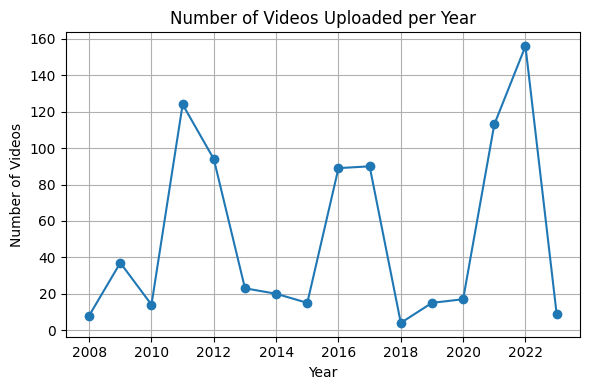

In [36]:
year_counts = all_data['upload_year'].dropna().astype(int).value_counts().sort_index()

plt.figure(figsize=(6,4))
year_counts.plot(kind='line', marker='o')
plt.title('Number of Videos Uploaded per Year')
plt.xlabel('Year')
plt.ylabel('Number of Videos')
plt.grid(True)
plt.tight_layout()
plt.show()


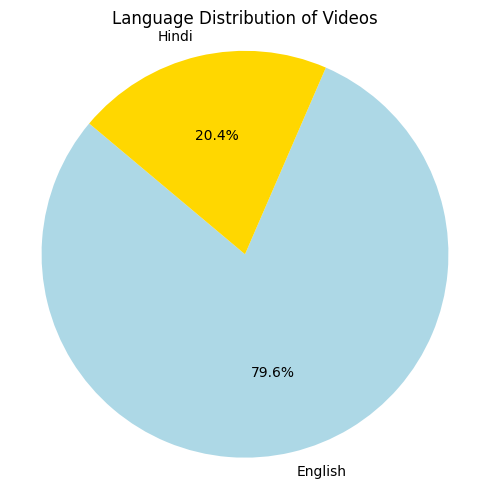

In [38]:
import matplotlib.pyplot as plt

# Counts
english_count = all_data[all_data['Language'].str.lower().str.contains('english', na=False)].shape[0]
hindi_count = all_data[all_data['Language'].str.lower().str.contains('hindi', na=False)].shape[0]

# Pie chart
labels = ['English', 'Hindi']
sizes = [english_count, hindi_count]
colors = ['lightblue', 'gold']

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Language Distribution of Videos')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle
plt.tight_layout()
plt.show()
